# scProportionTest Tutorial

In [1]:
from datetime import datetime
today = datetime.now().date().isoformat()
print(f"This notebook was last run on {today}.")

This notebook was last run on 2023-08-18.


In [2]:
%%capture
!pip install py-scProportionTest

In [3]:
import numpy as np
import pandas as pd
import scProportionTest as pt
from anndata import AnnData

## Create toy data

In [4]:
# Create toy dataset with 7 cell types
np.random.seed(42)
n_cells = 2000
n_genes = 50
X = np.random.rand(n_cells, n_genes)
groups = ["group1"] * 1000 + ["group2"] * 1000
cell_types_group1 = ["A"] * 150 + ["B"] * 150 + ["C"] * 150 + ["D"] * 200 + ["E"] * 100 + ["F"] * 150 + ["G"] * 100
cell_types_group2 = ["A"] * 100 + ["B"] * 100 + ["C"] * 50 + ["D"] * 200 + ["E"] * 100 + ["F"] * 150 + ["G"] * 300
cell_types = cell_types_group1 + cell_types_group2
adata = AnnData(X)
adata.obs['group'] = groups
adata.obs['cell_type'] = cell_types

In [5]:
display(adata.shape)
display(adata.obs.head(2))
display(pd.crosstab(adata.obs.group, adata.obs.cell_type))

(2000, 50)

,group,cell_type
0,group1,A
1,group1,A


cell_type,A,B,C,D,E,F,G
group,,,,,,,
group1,150,150,150,200,100,150,100
group2,100,100,50,200,100,150,300


## Permutation Test and Plotting

In [6]:
group1='group1'
group2='group2'

# Perform the permutation test
results = pt.permutation_test(  adata,
                                group1,
                                group2,
                                group_col='group',
                                cell_type_col='cell_type',
                                nperm=10000,
                                alpha=0.05,
                                n_bootstrap=10000,
                                verbose=True)

results


Processing cell types: 100%|████████████████████████████████████████████████████████████████| 7/7 [03:03<00:00, 26.19s/it]


,cell_type,p_value,observed_diff,lower_ci,upper_ci,adj_p_value
0,A,0.0018,0.584963,0.244734,0.935167,0.00315
1,B,0.0009,0.584963,0.247928,0.933788,0.00210
2,C,0.0001,1.584963,1.155795,2.063326,0.00035
3,D,1.0000,0.000000,-0.255042,0.247104,1.00000
4,E,1.0000,0.000000,-0.372834,0.383915,1.00000
5,F,1.0000,0.000000,-0.305423,0.303392,1.00000
6,G,0.0001,-1.584963,-1.901085,-1.293731,0.00035


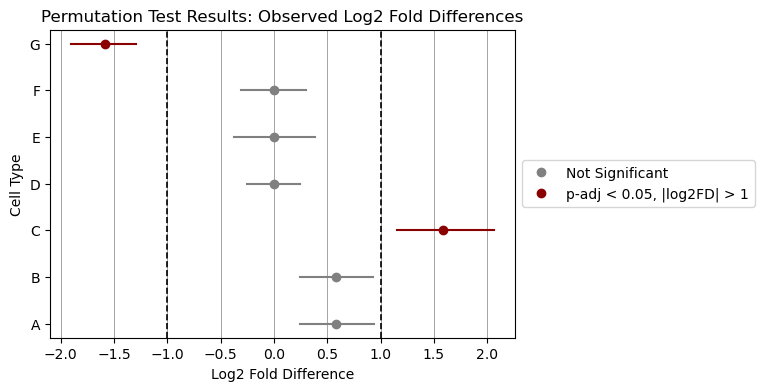

In [7]:
plot = pt.point_range_plot(results, figsize=(6,4))